In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from feature2 import getData
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
import numpy as np
from sklearn.metrics import roc_curve, auc,roc_auc_score
from itertools import cycle

In [2]:
data=getData()

                           perclos  yawn_times  nod_times  \
perclos                   1.000000   -0.135789   0.291197   
yawn_times               -0.135789    1.000000  -0.274234   
nod_times                 0.291197   -0.274234   1.000000   
Maximum_eye_closure_time  0.706396   -0.103809   0.234903   
mouth_time               -0.084776    0.672789  -0.136558   
label                    -0.020886   -0.062858   0.095338   

                          Maximum_eye_closure_time  mouth_time     label  
perclos                                   0.706396   -0.084776 -0.020886  
yawn_times                               -0.103809    0.672789 -0.062858  
nod_times                                 0.234903   -0.136558  0.095338  
Maximum_eye_closure_time                  1.000000   -0.056213 -0.007357  
mouth_time                               -0.056213    1.000000  0.041078  
label                                    -0.007357    0.041078  1.000000  


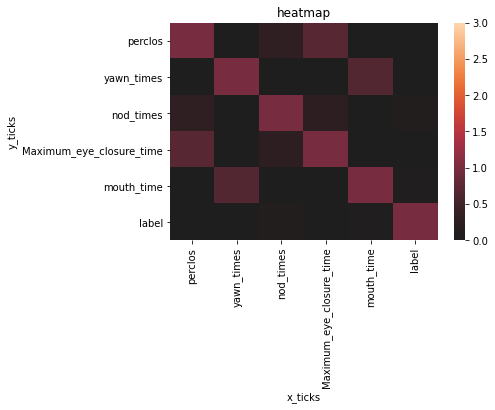

In [3]:
print(data.corr())
import seaborn
seaborn.heatmap(data.corr(),vmin=0,vmax=3,center=0)
plt.title("heatmap")
plt.xlabel("x_ticks")
plt.ylabel("y_ticks")
plt.show()

In [4]:
attr=['perclos','yawn_times','nod_times','Maximum_eye_closure_time','mouth_time','label']
print(data['label'])

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
482    0.0
483    2.0
484    0.0
485    2.0
486    0.0
Name: label, Length: 487, dtype: float64


In [5]:
X=data[attr[:5]]
#Y=label_binarize(data['label'], classes=[0, 1, 2])
Y=data['label']
print(X.shape)

(487, 5)


In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=61)

In [7]:
tr_cls=DecisionTreeClassifier()
#tr_cls=SVC(5)
#tr_cls=GaussianNB()
#tr_cls = RandomForestClassifier()
#random_state = np.random.RandomState(0)
#tr_cls = OneVsRestClassifier(svm.SVC(kernel='poly', probability=True))

In [8]:
tr_cls.fit(X_train,Y_train.astype('int'))

DecisionTreeClassifier()

In [9]:
tr_cls.score(X_test,Y_test)

0.46938775510204084

In [10]:
y_scores = tr_cls.predict_proba(X_test)
print(y_scores.shape)

(98, 3)


In [11]:
colors = ["r", "g", "b", "k"]
markers = ["o", "^", "v", "+"]

In [12]:
y_test = label_binarize(Y_test, classes=tr_cls.classes_)
print(y_test.shape)

(98, 3)


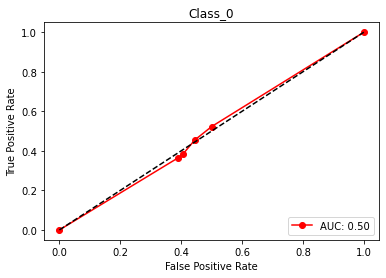

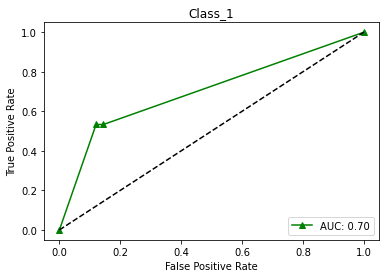

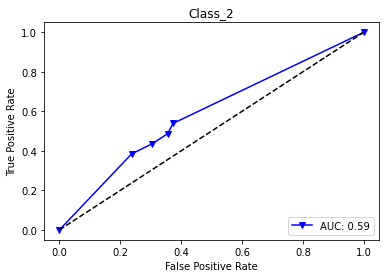

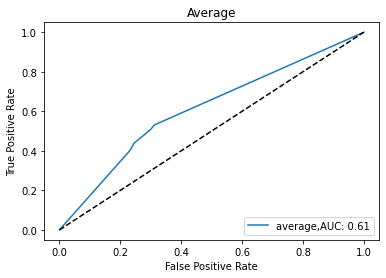

AUC: [0.50105219 0.70080321 0.58800522]


In [13]:
for i in range(3):
    # 计算每个类别的FPR, TPR 
    fpr, tpr, thr = roc_curve(y_test[:, i], y_scores[:, i])
#     print("classes_{}, fpr: {}, tpr: {}, threshold: {}".format(i, fpr, tpr, thr))
    # 绘制ROC曲线，并计算AUC值
    #axes[int(i / 2), i % 2].plot(fpr, tpr, color=colors[i], marker=markers[i], label="AUC: {:.2f}".format(auc(fpr, tpr)))
    plt.plot(fpr, tpr, color=colors[i], marker=markers[i], label="AUC: {:.2f}".format(auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    
    plt.title("Class_{}".format(tr_cls.classes_[i]))
    plt.legend(loc="lower right")
    plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_scores.ravel())
plt.plot(fpr, tpr, label="average,AUC: {:.2f}".format(roc_auc_score(y_test, y_scores, average='micro')))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
    
plt.title("Average")
plt.legend(loc="lower right")
plt.show()
print("AUC:", roc_auc_score(y_test, tr_cls.predict_proba(X_test), multi_class="ovr", average=None))

0.6110995418575593


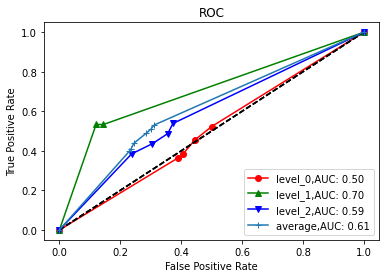

AUC: [0.50105219 0.70080321 0.58800522]


In [14]:
for i in range(3):
        # 计算每个类别的FPR, TPR
        fpr, tpr, thr = roc_curve(y_test[:, i], y_scores[:, i])
        colors = ["r", "g", "b"]
        markers = ["o", "^", "v", "+"]
        plt.plot(fpr, tpr, color=colors[i], marker=markers[i], label="level_{},AUC: {:.2f}".format(i, auc(fpr, tpr)))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_scores.ravel())
print(roc_auc_score(y_test, y_scores, average='micro'))
plt.plot(fpr, tpr, marker="+", label="average,AUC: {:.2f}".format(roc_auc_score(y_test, y_scores, average='micro')))
plt.legend(loc="lower right")
plt.title('ROC')
plt.show()
print("AUC:", roc_auc_score(y_test, y_scores, multi_class="ovr", average=None))

[0.34320326 0.19763353 0.16418774 0.17325281 0.12172265]


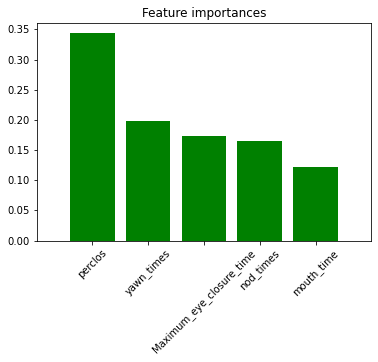

In [15]:
importances = tr_cls.feature_importances_
print(importances)
indices = np.argsort(importances)[::-1]
num_features = len(importances)
 
#将特征重要度以柱状图展示
plt.figure()
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="g", align="center")
plt.xticks(range(num_features), [attr[i] for i in indices], rotation='45')
plt.xlim([-1, num_features])
plt.show()

In [16]:
from sklearn.metrics import classification_report
prediction = tr_cls.predict(X_test)#
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.46      0.52      0.49        44
         1.0       0.42      0.53      0.47        15
         2.0       0.52      0.38      0.44        39

    accuracy                           0.47        98
   macro avg       0.47      0.48      0.47        98
weighted avg       0.48      0.47      0.47        98



[[23  8 13]
 [ 6  8  1]
 [21  3 15]]


Text(0.5, 1.0, 'confusion matrix')

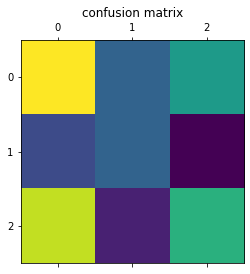

In [17]:
from sklearn.metrics import confusion_matrix
y_pred = tr_cls.predict(X_test)
C=confusion_matrix(Y_test, y_pred)
print(C)
plt.matshow(C)
plt.title('confusion matrix')

In [18]:
Y_tt=tr_cls.predict(X_train)
print(classification_report(Y_train,Y_tt))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       191
         1.0       0.97      0.94      0.95        79
         2.0       0.99      0.83      0.90       119

    accuracy                           0.93       389
   macro avg       0.95      0.92      0.93       389
weighted avg       0.94      0.93      0.93       389



In [19]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard', weights=[2,1,2]) # 集成学习

In [20]:
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
     scores = model_selection.cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')
     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.53 (+/- 0.04) [Logistic Regression]
Accuracy: 0.45 (+/- 0.04) [Random Forest]
Accuracy: 0.51 (+/- 0.03) [naive Bayes]
Accuracy: 0.52 (+/- 0.04) [Ensemble]


In [21]:
eclf.fit(X_train,Y_train)
Y_pre2=eclf.predict(X_test)
print(classification_report(Y_test,Y_pre2))
eclf.score(X_test,Y_test)

              precision    recall  f1-score   support

         0.0       0.50      0.86      0.63        44
         1.0       0.53      0.60      0.56        15
         2.0       0.60      0.08      0.14        39

    accuracy                           0.51        98
   macro avg       0.54      0.51      0.44        98
weighted avg       0.54      0.51      0.42        98



0.5102040816326531